In [15]:
from test.helpers import (
    get_mlp_sde,
    get_time_sde,
)

import diffrax
import jax.numpy as jnp
import jax.random as jr
import jax.tree_util as jtu
from diffrax import (
    diffeqsolve,
    SpaceTimeLevyArea,
    SPaRK,
)
from drawing_and_evaluating import (
    constant_step_strong_order,
    draw_order_single,
    get_fine_solutions,
    plot_sol_general,
    save_ref_sol,
)
from jax import config


config.update("jax_enable_x64", True)
jnp.set_printoptions(precision=4, suppress=True)

dtype = jnp.float64
key = jr.PRNGKey(2)
sde_key = jr.PRNGKey(11)
num_samples = 1000
keys = jr.split(jr.PRNGKey(5678), num=num_samples)
bm_tol = 2**-14
levy_area = SpaceTimeLevyArea

t0, t1 = 0.0, 16.0
t_short = 4.0
t_long = 32.0
dt0 = 2**-7
save_at_solver_steps = diffrax.SaveAt(steps=True)

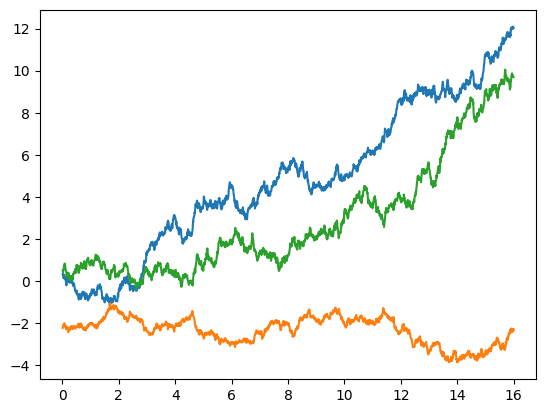

In [10]:
mlp_sde = get_mlp_sde(t0, t1, dtype=dtype, key=sde_key, noise_dim=3)
terms_mlp_sde = mlp_sde.get_terms(mlp_sde.get_bm(key, levy_area=levy_area, tol=2**-10))
mlp_sde_short = get_mlp_sde(t0, t_short, dtype=dtype, key=sde_key, noise_dim=3)

sol_mlp_sde = diffeqsolve(
    terms_mlp_sde,
    SPaRK(),
    t0,
    t1,
    dt0,
    mlp_sde.y0,
    mlp_sde.args,
    saveat=save_at_solver_steps,
)
plot_sol_general(sol_mlp_sde)

In [11]:
ref_sol_mlp_sde = get_fine_solutions(
    keys, mlp_sde_short, SPaRK(), levy_area, bm_tol, 8, 14
)
print(jtu.tree_map(lambda x: x.shape, ref_sol_mlp_sde))
save_ref_sol(ref_sol_mlp_sde, "mlp_sde")
ref_sol_mlp_sde = jnp.load("data/ref_sol_mlp_sde.npy")
print(jtu.tree_map(lambda x: x.shape, ref_sol_mlp_sde))

(1000, 257, 3)
(1000, 257, 3)


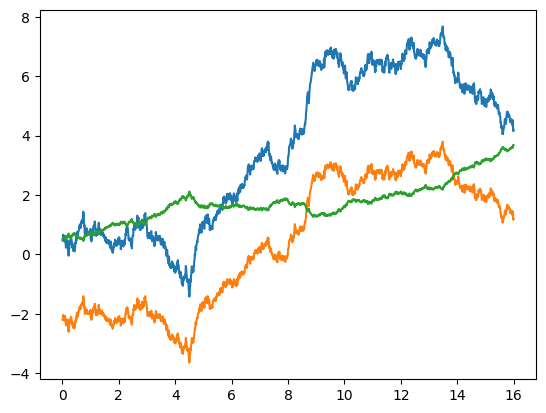

In [12]:
commutative_sde = get_mlp_sde(t0, t1, dtype=dtype, key=sde_key, noise_dim=1)
terms_commutative_sde = commutative_sde.get_terms(
    commutative_sde.get_bm(key, levy_area=levy_area, tol=2**-10)
)
commutative_sde_short = get_mlp_sde(t0, t_short, dtype=dtype, key=sde_key, noise_dim=1)

sol_commutative_sde = diffeqsolve(
    terms_commutative_sde,
    SPaRK(),
    t0,
    t1,
    dt0,
    commutative_sde.y0,
    commutative_sde.args,
    saveat=save_at_solver_steps,
)
plot_sol_general(sol_commutative_sde)

In [13]:
ref_sol_commutative_sde = get_fine_solutions(
    keys, commutative_sde_short, SPaRK(), levy_area, bm_tol, 8, 14
)
print(jtu.tree_map(lambda x: x.shape, ref_sol_commutative_sde))
save_ref_sol(ref_sol_commutative_sde, "commutative_sde")
ref_sol_commutative_sde = jnp.load("data/ref_sol_commutative_sde.npy")
print(jtu.tree_map(lambda x: x.shape, ref_sol_commutative_sde))

(1000, 257, 3)
(1000, 257, 3)


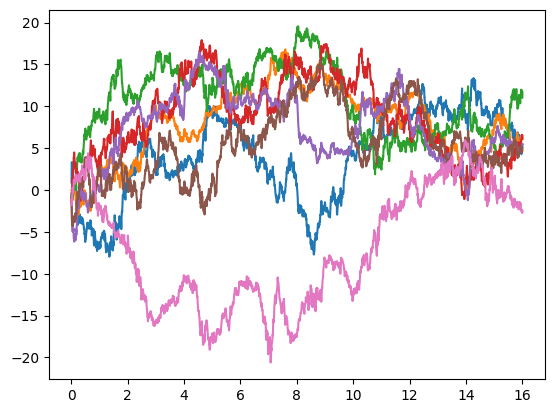

In [9]:
time_sde = get_time_sde(t0, t1, dtype=dtype, noise_dim=7, key=sde_key)
terms_time_sde = time_sde.get_terms(
    time_sde.get_bm(key, levy_area=levy_area, tol=2**-10)
)
time_sde_short = get_time_sde(t0, t_short, dtype=dtype, noise_dim=7, key=sde_key)

sol_time_sde = diffeqsolve(
    terms_time_sde,
    SPaRK(),
    t0,
    t1,
    dt0,
    time_sde.y0,
    time_sde.args,
    saveat=save_at_solver_steps,
)
plot_sol_general(sol_time_sde)

In [4]:
# ref_sol_time_sde = get_fine_solutions(keys, time_sde_short, SPaRK(), levy_area, 2**-14, 8, 16)
# print(jtu.tree_map(lambda x: x.shape, ref_sol_time_sde))
# save_ref_sol(ref_sol_time_sde, "time_sde")
ref_sol_time_sde = jnp.load("data/ref_sol_time_sde.npnpyy")
print(jtu.tree_map(lambda x: x.shape, ref_sol_time_sde))

(1000, 257, 7)


In [ ]:
out_Euler_time_sde = constant_step_strong_order(
    keys, time_sde_short, diffrax.Euler(), (6, 12), bm_tol, levy_area, ref_sol_time_sde
)

In [19]:
out_Euler_commutive_sde = constant_step_strong_order(
    keys, commutative_sde_short, diffrax.Euler(), (6, 12), bm_tol, levy_area
)

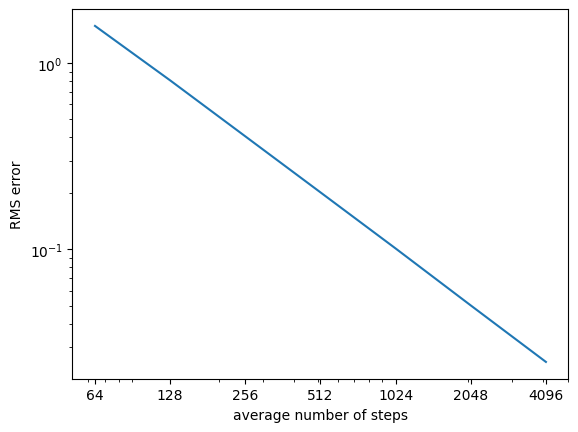

Order of convergence: 1.0000


In [17]:
draw_order_single(out_Euler_time_sde)

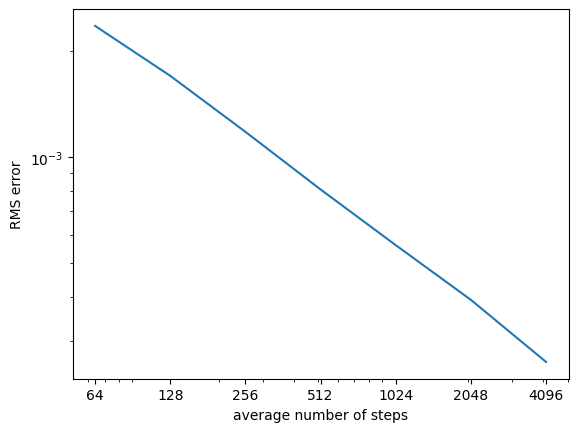

Order of convergence: 0.5307


In [20]:
draw_order_single(out_Euler_commutive_sde)